In [27]:
pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 1.4MB/s 
  Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


In [0]:
import pandas as pd

In [3]:
uri = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(uri)
filmes.head()

filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [0]:
from sklearn.cluster import KMeans

In [8]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print(f'Grupos {modelo.labels_}')

Grupos [2 2 0 ... 0 2 0]


In [9]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.03533334 -0.21901753 -0.15218333 -0.25259387 -0.27045122  0.23009714
  -0.16405215  0.12669424  0.16264441 -0.10805096 -0.08969801 -0.27623182
  -0.10503622  0.0187975  -0.18588492  0.19252019 -0.22652299 -0.47800338
   0.07923053  0.04096061]
 [-0.05917995  0.50311199  0.01817988 -0.23400019 -0.2674834  -0.60234539
   0.48823    -0.21568861 -0.15719486 -0.07972202  0.238985    0.72992176
   0.12029621 -0.1781427   0.47162652 -0.34058195  0.46872987  1.26071225
  -0.11917104 -0.06291882]
 [-0.05917995 -0.00962244  0.90878645  2.23816024  2.443185    0.21392461
  -0.31488521 -0.20256563 -0.59069409  0.90112351 -0.09492563 -0.27561643
   0.32959593  0.37364544 -0.13143727 -0.27237294  0.13265141 -0.47037595
 

In [13]:
grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.035333,-0.219018,-0.152183,-0.252594,-0.270451,0.230097,-0.164052,0.126694,0.162644,-0.108051,-0.089698,-0.276232,-0.105036,0.018798,-0.185885,0.192520,-0.226523,-0.478003,0.079231,0.040961
1,-0.059180,0.503112,0.018180,-0.234000,-0.267483,-0.602345,0.488230,-0.215689,-0.157195,-0.079722,0.238985,0.729922,0.120296,-0.178143,0.471627,-0.340582,0.468730,1.260712,-0.119171,-0.062919
2,-0.059180,-0.009622,0.908786,2.238160,2.443185,0.213925,-0.314885,-0.202566,-0.590694,0.901124,-0.094926,-0.275616,0.329596,0.373645,-0.131437,-0.272373,0.132651,-0.470376,-0.170086,-0.084313


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cdbcc4278>,
      dtype=object)

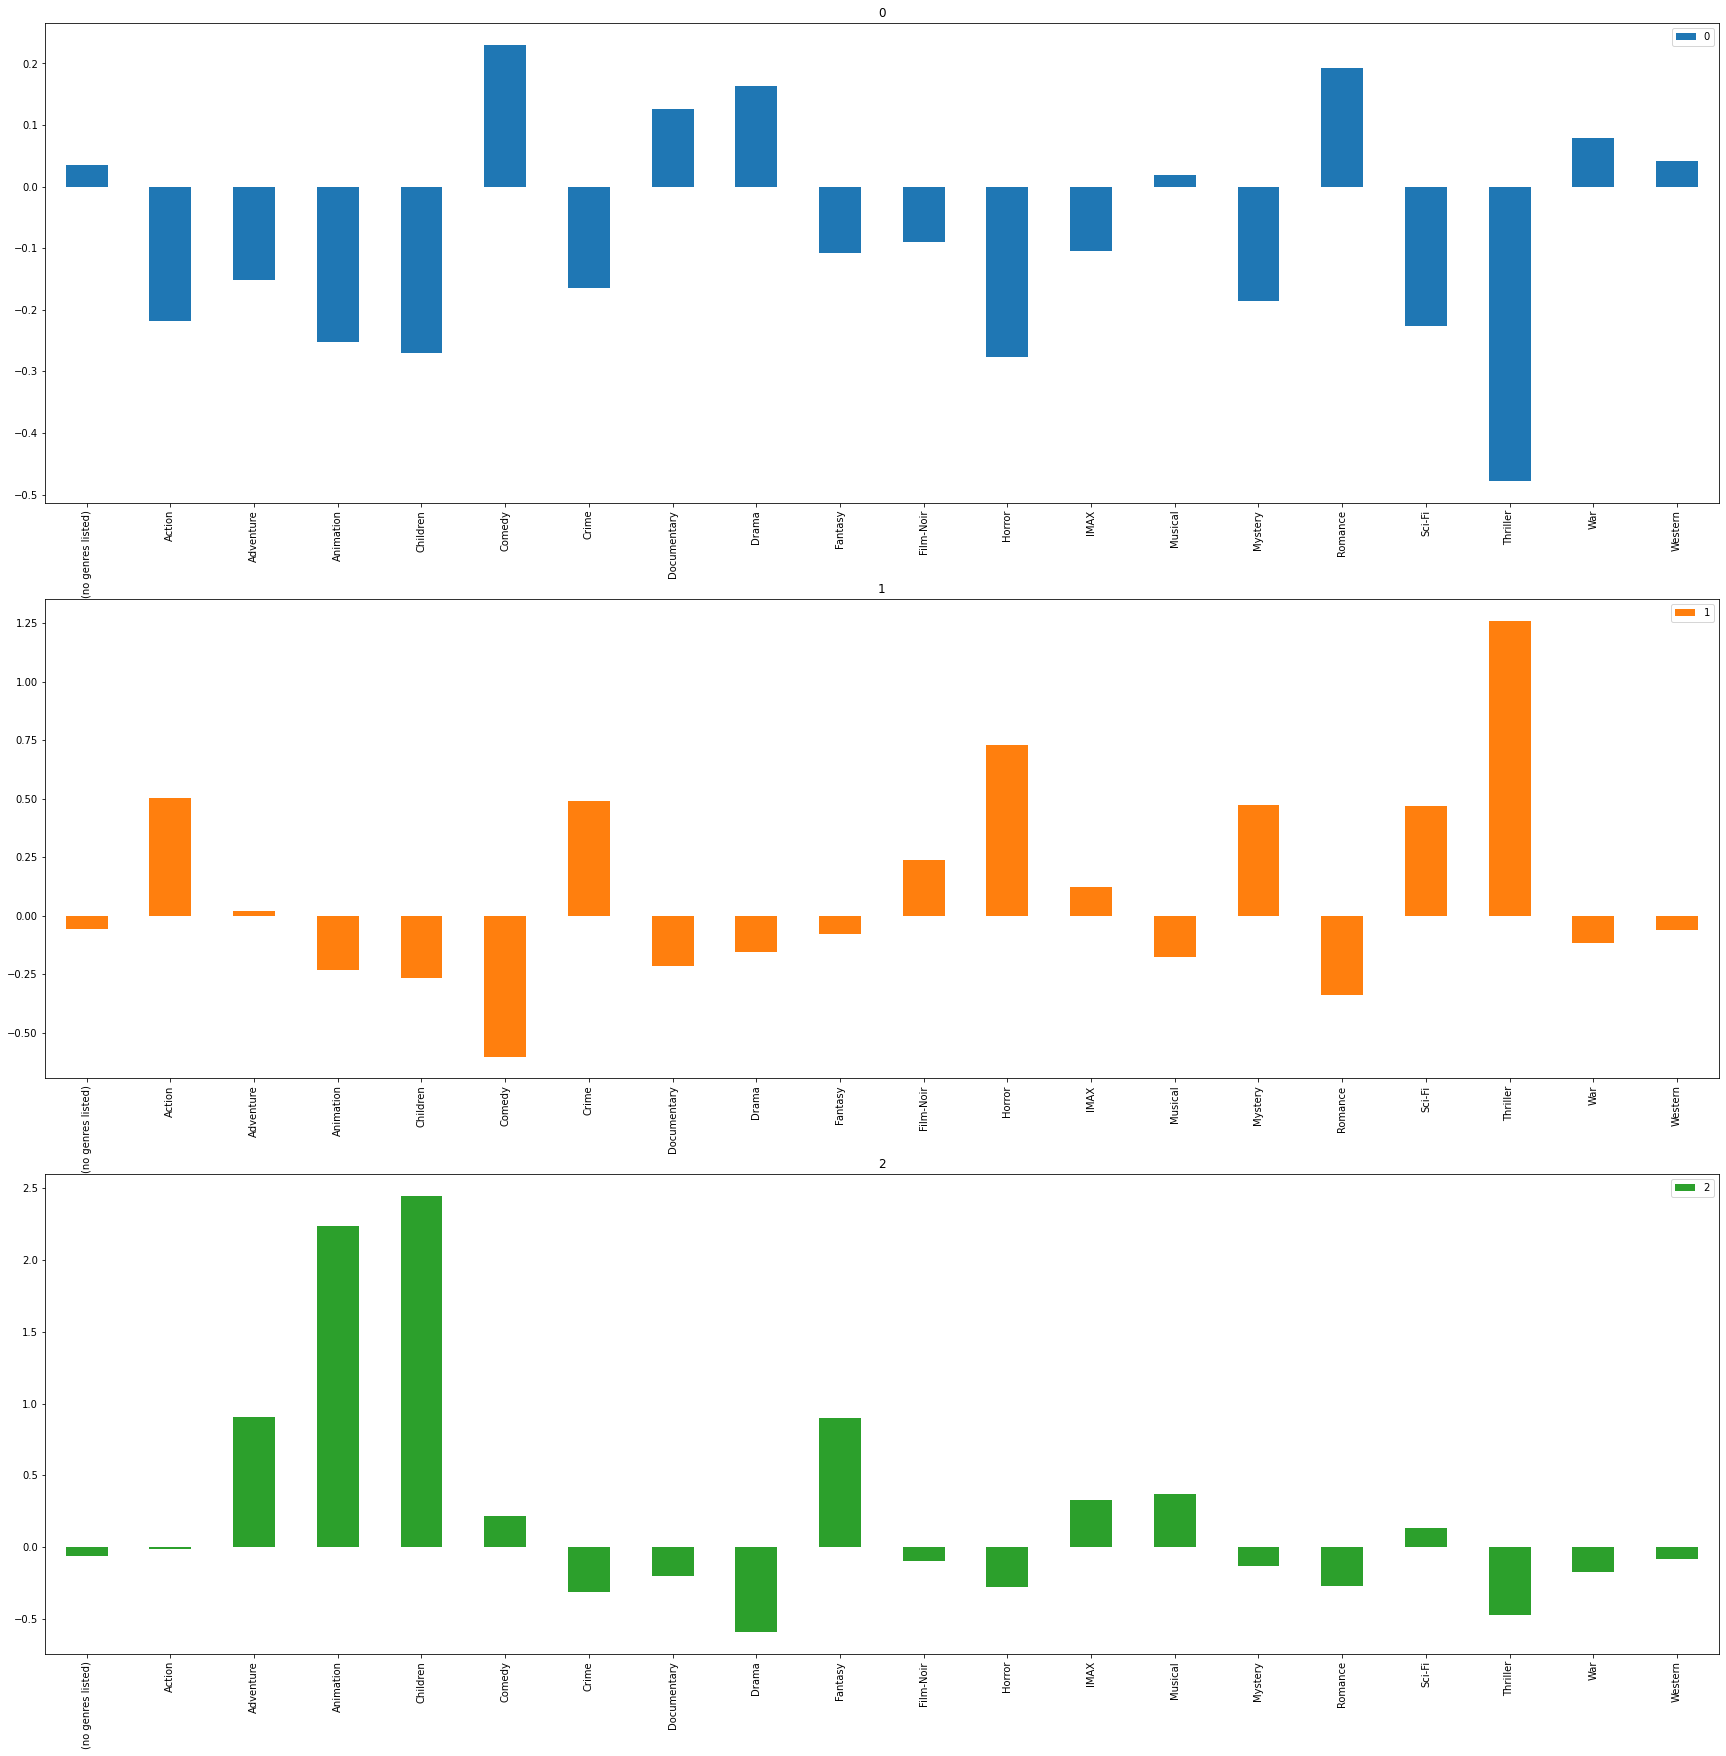

In [15]:
grupos.transpose().plot.bar(subplots=True,
                figsize=(30,30),
                sharex=False)

In [16]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2960,3968,Bedazzled (2000),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7560,85401,Super (2010),Action|Comedy|Drama,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8570,116799,Inherent Vice (2014),Comedy|Crime|Drama|Mystery|Romance,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0
3650,5014,I Am Sam (2001),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4788,7131,"Summer Place, A (1959)",Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2701,3624,Shanghai Noon (2000),Action|Adventure|Comedy|Western,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1946,2580,Go (1999),Comedy|Crime,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1046,1358,Sling Blade (1996),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5959,34523,The Chumscrubber (2005),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9712,188189,Sorry to Bother You (2018),Comedy|Fantasy|Sci-Fi,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [17]:
from sklearn.datasets import make_blobs
dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


ERROR! Session/line number was not unique in database. History logging moved to new session 59


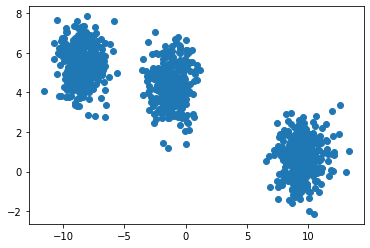

In [18]:
import matplotlib.pyplot as plt

plt.scatter(x=dados.coluna1, y=dados.coluna2)

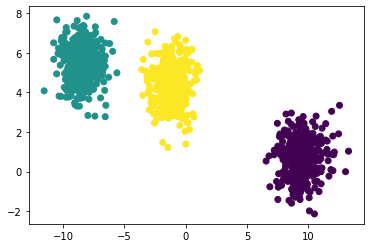

In [19]:
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)
plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis')

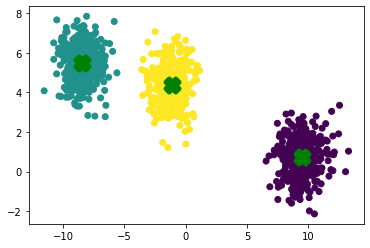

In [22]:
centroides = modelo.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)


In [0]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 51.9543   ,  -1.5731655],
       [ 61.575706 ,  10.773352 ],
       [ -8.426539 , -37.52083  ],
       ...,
       [ 16.47128  , -18.090986 ],
       [-39.12197  , -34.702007 ],
       [-16.96251  ,   6.921538 ]], dtype=float32)

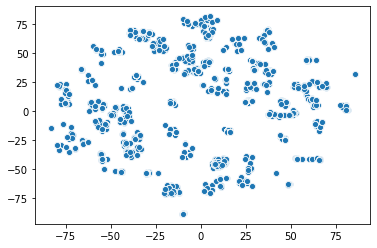

In [28]:
import seaborn as sns

sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1])